# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [3]:
import scipy.io as sio
mat = sio.loadmat('data/ejer_1_data1.mat')

In [5]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [9]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [11]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [12]:
df['y'].value_counts(normalize=True)

0    0.588235
1    0.411765
Name: y, dtype: float64

#### 4. Plot a scatterplot with the data

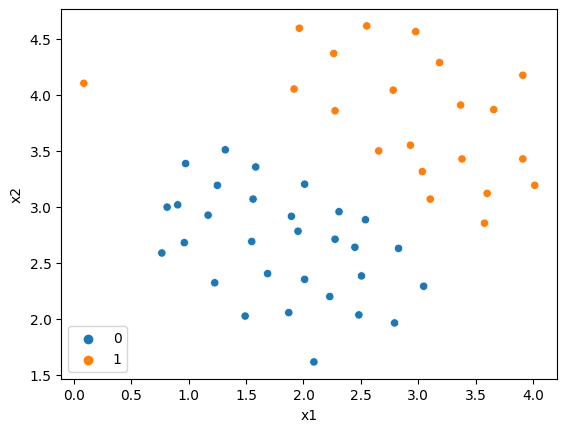

In [15]:
sns.scatterplot(df, x="x1", y="x2", hue="y")
plt.legend(loc="lower left")

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [16]:
from sklearn.svm import LinearSVC

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [17]:
X = df[['x1','x2']]
y = df['y']

svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [22]:
svc_2 = LinearSVC(C=1000, loss='hinge', max_iter=1000000)

X = df[['x1','x2']]
y = df['y']

svc_2.fit(X, y)
svc_2.score(X, y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [23]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80275305,  0.38383387,  1.37739602,  0.52108334,  0.33331569,
        0.86860301,  0.68643142,  1.61110437,  0.83439481,  1.16704401,
        1.07314463,  0.22972287,  0.33175095,  0.7957263 ,  0.31571633,
        1.2739964 ,  1.21009491,  0.99987694,  0.56465504,  0.38980941,
       -0.43529053, -0.30886756, -0.68627372, -0.55403612, -0.33252732,
       -0.2938588 , -0.44071875, -0.98399648, -0.68564304, -1.32848537,
       -1.00380124, -1.49231669, -0.61143704, -0.68346301, -1.00005223,
       -1.15275366, -1.57841884, -1.3559971 , -1.03241491, -1.18505989,
       -0.77143334, -0.76694496, -0.4665244 , -1.        , -0.51034881,
       -0.85864317, -1.5590289 , -0.25490953, -1.1136661 , -1.54720612,
       -0.70997702])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


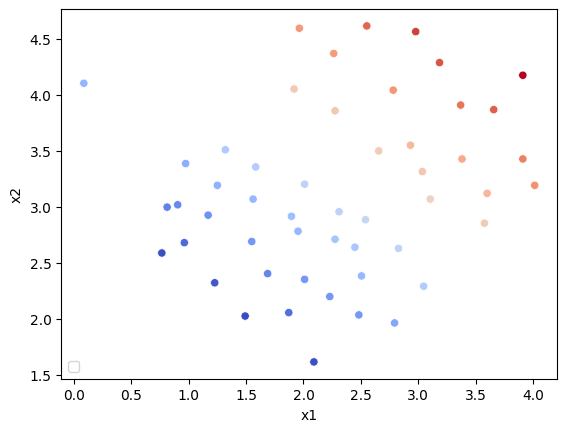

In [25]:
sns.scatterplot(df, x="x1", y="x2", c=conf_level, cmap="coolwarm")
plt.legend(loc="lower left")

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

<Axes: xlabel='x1', ylabel='x2'>

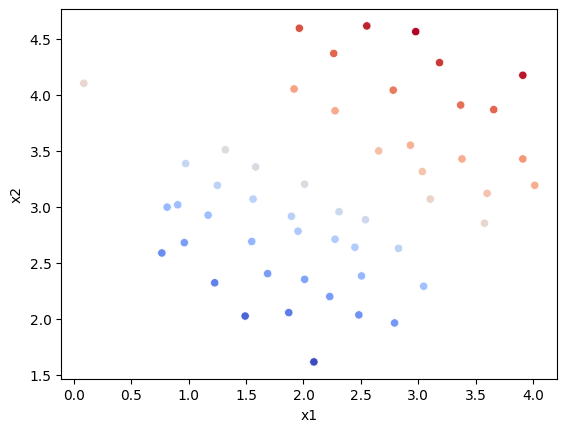

In [27]:
conf_level = svc_2.decision_function(X)
conf_level
sns.scatterplot(df, x="x1", y="x2", c=conf_level, cmap="coolwarm")
# plt.legend(loc="lower left")

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

bx2 = -ax1 - c

x2 = (-a/b)x1 - c/b

In [28]:
svc_1.coef_

array([[0.59151825, 0.81824289]])

In [29]:
svc_1.intercept_

array([-4.11956508])

In [33]:
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_[0]

In [34]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

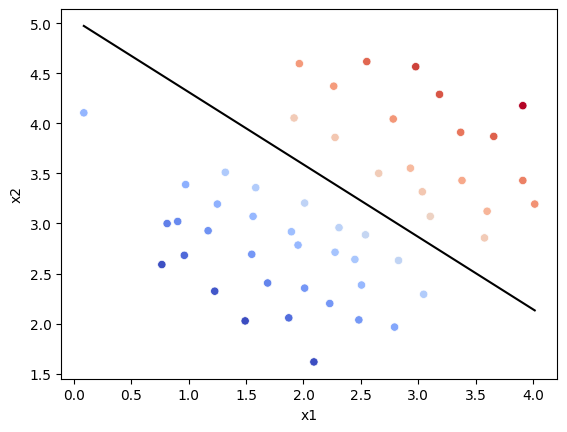

In [35]:
conf_level = svc_1.decision_function(X)
sns.scatterplot(df, x="x1", y="x2", c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="k")

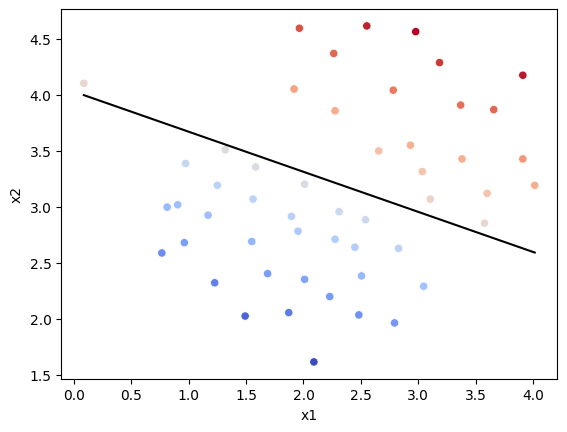

In [36]:
a = svc_2.coef_[0][0]
b = svc_2.coef_[0][1]
c = svc_2.intercept_[0]

x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

conf_level = svc_2.decision_function(X)
sns.scatterplot(df, x="x1", y="x2", c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="k")

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [37]:
mat = sio.loadmat('data/ejer_1_data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [40]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [42]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

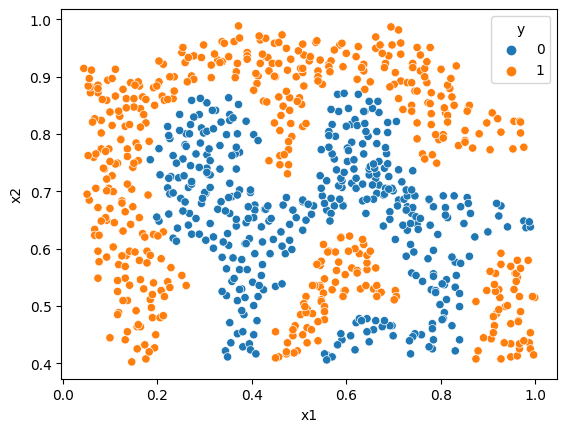

In [43]:
sns.scatterplot(df, x='x1', y='x2', hue='y')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

accuracy 0.5538818076477404


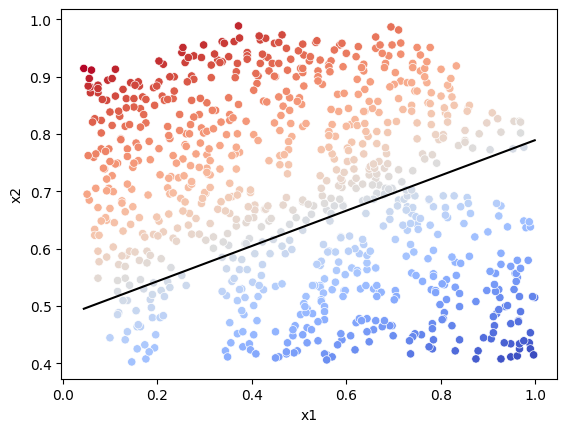

In [45]:
svc_3 = LinearSVC(C=1, loss='hinge', max_iter=1000000)

X = df[['x1','x2']]
y = df['y']

svc_3.fit(X, y)
print("accuracy",svc_3.score(X, y))

a = svc_3.coef_[0][0]
b = svc_3.coef_[0][1]
c = svc_3.intercept_[0]

x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

conf_level = svc_3.decision_function(X)
sns.scatterplot(df, x="x1", y="x2", c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="k")

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [46]:
from sklearn.svm import SVC

In [68]:
svc_4 = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [69]:
svc_4.fit(X, y)

SVC(C=100, gamma=10, probability=True)

In [70]:
svc_4.score(X, y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [71]:
y_pred_proba = svc_4.predict_proba(X)
y_pred_proba

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]])

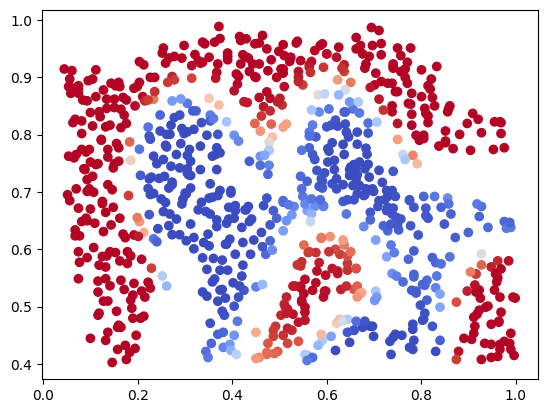

In [72]:
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

0.8273464658169177


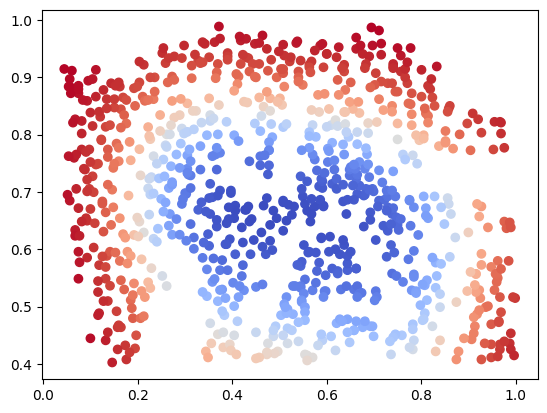

In [73]:
svc_5 = SVC(C=0.1, gamma=10, probability=True)
svc_5.fit(X, y)
print(svc_5.score(X, y))
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='x1', ylabel='x2'>

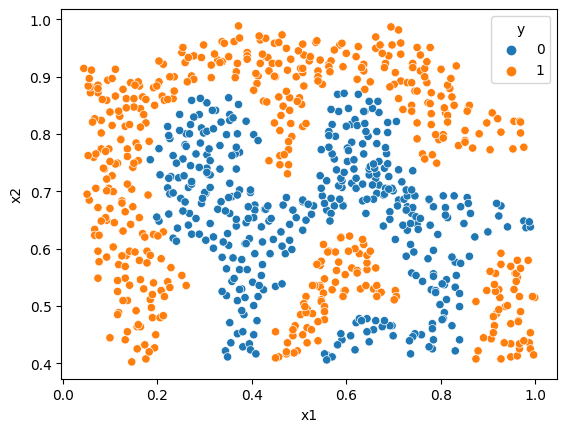

In [75]:
sns.scatterplot(df, x='x1', y='x2', hue='y')

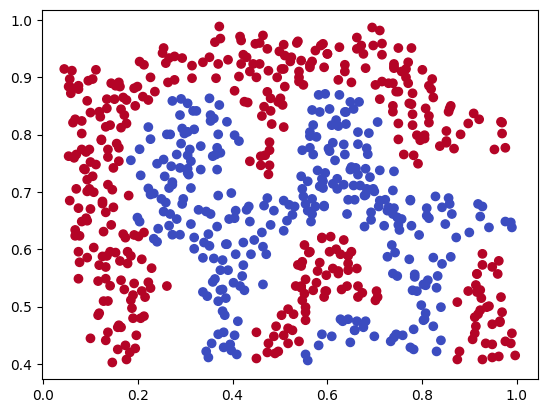

In [79]:
plt.scatter(X_train['x1'],  X_train['x2'], c=y_train, cmap="coolwarm")

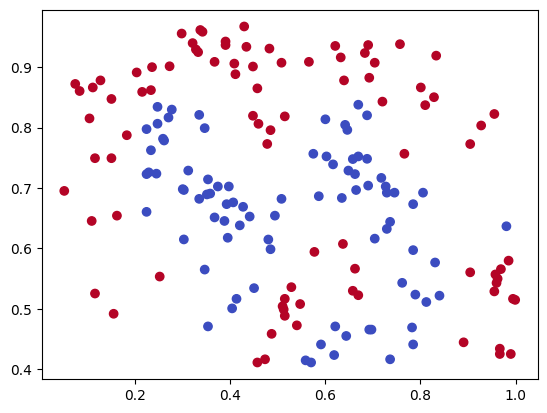

In [81]:
plt.scatter(X_test['x1'],  X_test['x2'], c=y_test, cmap="coolwarm")

In [83]:
parameters = {
    "kernel": ['rbf', 'poly'],
    'C': [50, 100, 200]
}

gs = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVC(C=200)
0.9579710144927537
{'C': 200, 'kernel': 'rbf'}


In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
parameters = {
    "kernel": ['rbf', 'poly'],
    'C': np.arange(50,300,10)
}

gs = RandomizedSearchCV(SVC(), parameters, cv=5, scoring='accuracy', verbose=3, n_jobs=-1, n_iter=20)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVC(C=190)
0.9594202898550727
{'kernel': 'rbf', 'C': 190}


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [88]:
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Accuracy_score 0.9595375722543352
confusion_matrix
 [[84  1]
 [ 6 82]]


In [89]:
final_model

SVC(C=190)

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline((('polynomial', PolynomialFeatures(5)),
                ('classifier', LinearSVC(C=1000, max_iter=100000))))

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.884393063583815